**Table of contents**<a id='toc0_'></a>    
- [*Functions for plotting linear regression models*](#toc1_)    
- [*Fitting regression models to the data*](#toc2_)    
  - [**Fitting a simple linear regression model**](#toc2_1_)    
  - [**Verify if simple linear regression is appropriate for the data and change the order of the regression model accordingly**](#toc2_2_)    
  - [**Robust regression**](#toc2_3_)    
  - [**Logistic regression**](#toc2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default seaborn theme
sns.set_theme(style="darkgrid")

In [3]:
# Loading in an example dataset
restaurant_tips = sns.load_dataset("tips")
restaurant_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Estimating Regression Fits

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We already discussed scatter plots and heatmaps. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. We will do so through the common framework of linear regression.

- ##### Caution
Seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use statistical libraries. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

## <a id='toc1_'></a>[*Functions for plotting linear regression models*](#toc0_)

> We can use the, `seaborn.lmplot(data=None, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', hue_order=None, col_order=None, row_order=None, legend=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)` function to draw a scatterplot and fit a regression model to it. 
> 
> >This function acts as a wrapper to the `seaborn.regplot()` and returns a FacetGrid Object. To draw the regression line on a single axis we can use the `seaborn.regplot()` function. 
>
>> See the tutorial @https://seaborn.pydata.org/tutorial/regression.html.

**Note:** The `sns.regplot()` and `sns.lmplot()` functions are similar but, 
- regplot() is an axes-level function, and lmplot() is a figure-level function
- regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas.Series objects, or as references to variables in a pandas.DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. 
- only lmplot() has *'hue'* as a parameter

## <a id='toc2_'></a>[*Fitting regression models to the data*](#toc0_)

### <a id='toc2_1_'></a>[**Fitting a simple linear regression model**](#toc0_)

In [4]:
restaurant_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


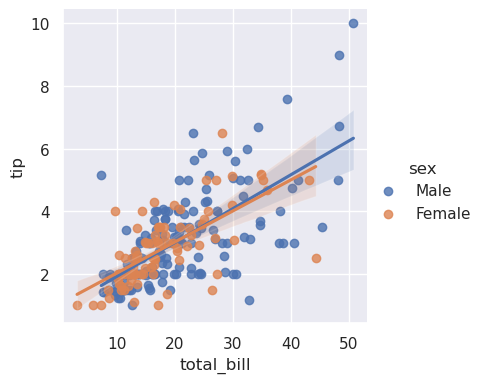

In [5]:
sns.lmplot(data=restaurant_tips, x="total_bill", y="tip", hue="sex", height=4)
plt.show()

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal.

>> In such cases one option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


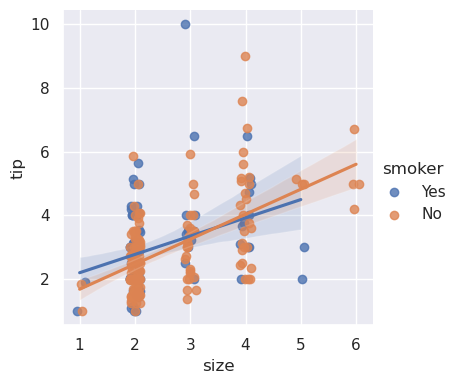

In [6]:
sns.lmplot(
    data=restaurant_tips, x="size", y="tip", hue="smoker", x_jitter=0.1, height=4
)
plt.show()

>> A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


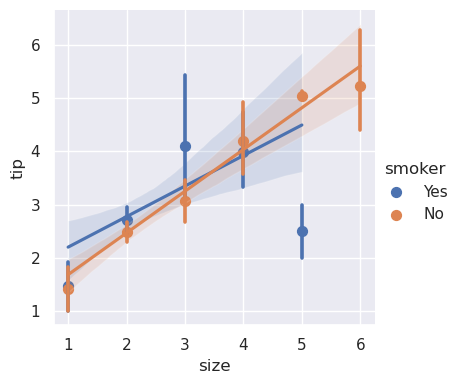

In [7]:
sns.lmplot(
    data=restaurant_tips, x="size", y="tip", hue="smoker", x_estimator=np.mean, height=4
)
plt.show()

**`Note:`** We can use the `x_bin` argument of the `lmplot` function to convert the x variable into discrete bins and then estimate the central tendency and a confidence interval. This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. This parameter is interpreted either as the number of evenly-sized (not necessarily evenly spaced) bins or the positions of the bin centers. When this parameter is used, it implies that the default of `x_estimator` is numpy.mean.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


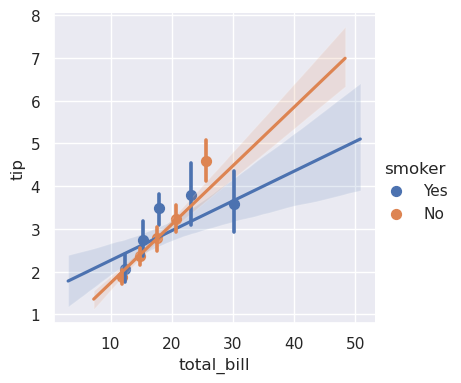

In [8]:
sns.lmplot(
    data=restaurant_tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    x_bins=5,
    x_estimator=np.mean,
    height=4,
)
plt.show()

In [9]:
restaurant_tips.total_bill.max()

50.81

### <a id='toc2_2_'></a>[**Verify if simple linear regression is appropriate for the data and change the order of the regression model accordingly**](#toc0_)

> The `residplot(data=None, *, x=None, y=None, x_partial=None, y_partial=None, lowess=False, order=1, robust=False, dropna=True, label=None, color=None, scatter_kws=None, line_kws=None, ax=None)` function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0. If there is structure in the residuals, it suggests that simple linear regression is not appropriate.
>
>> **Note:** This function can also be used to check if higher order polynomial regression models are appropriate for a dataset. Use the order parameter to explore which one is more appropriate (the residuals should be randomly distributed around y=0).
>
>> The function documentation can be found at, https://seaborn.pydata.org/generated/seaborn.residplot.html#seaborn.residplot.

In [10]:
anscombe = sns.load_dataset("anscombe")

In [11]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


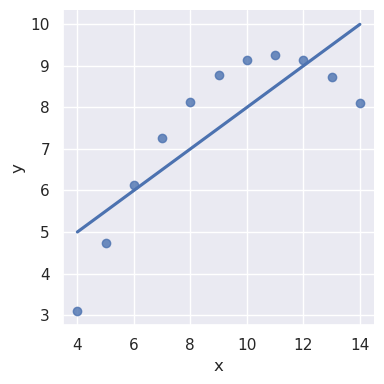

In [12]:
# first let's see if a linear regression model fits the data
sns.lmplot(data=anscombe[anscombe.dataset == "II"], x="x", y="y", ci=None, height=4)
plt.show()

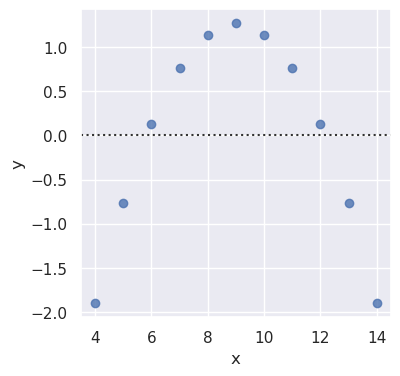

In [13]:
# clearly it doesn't quite capture the true relationship
# let's inspect with residplot()
fig, ax = plt.subplots(figsize=(4, 4))
sns.residplot(data=anscombe[anscombe.dataset == "II"], x="x", y="y", ax=ax)
plt.show()

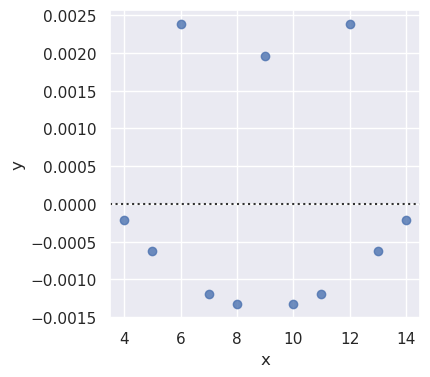

In [14]:
# let's inspect with order=2
fig, ax = plt.subplots(figsize=(4, 4))
sns.residplot(data=anscombe[anscombe.dataset == "II"], x="x", y="y", order=2, ax=ax)
plt.show()

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


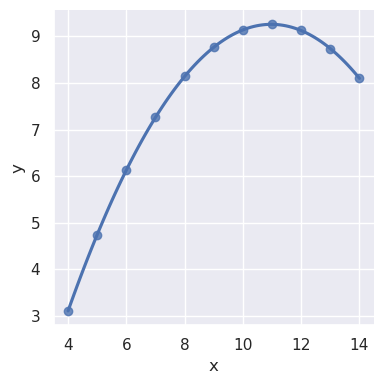

In [15]:
# let's see whether regression model of order 2 fits the data now
sns.lmplot(
    data=anscombe[anscombe.dataset == "II"], x="x", y="y", ci=None, order=2, height=4
)
plt.show()

### <a id='toc2_3_'></a>[**Robust regression**](#toc0_)

A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study. In the presence of outliers, it can be useful to fit a robust regression (*use `robust=True`*), which uses a different loss function to downweight relatively large residuals.

**Note:** It is computationally intensive. So, use *ci=None* if not required.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


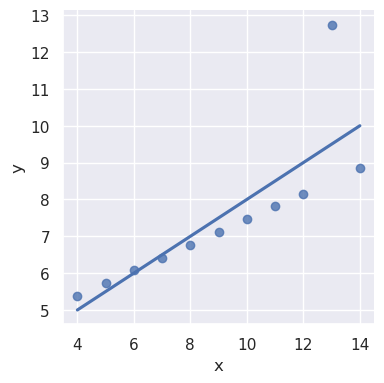

In [16]:
# normal linear regression model
sns.lmplot(data=anscombe[anscombe.dataset == "III"], x="x", y="y", ci=None, height=4)
plt.show()

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


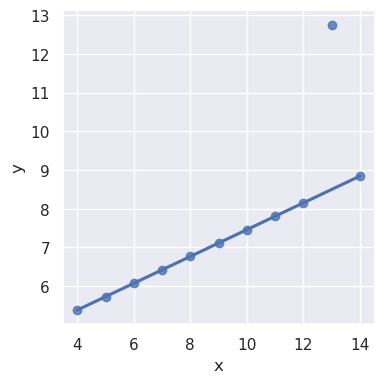

In [17]:
# with robust regression
sns.lmplot(
    data=anscombe[anscombe.dataset == "III"],
    x="x",
    y="y",
    ci=None,
    robust=True,
    height=4,
)
plt.show()

### <a id='toc2_4_'></a>[**Logistic regression**](#toc0_)

When the y variable is binary, simple linear regression also “works” but provides implausible predictions. The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x (*use `logistic=True`*).

**Note:** It is computationally intensive. So, use *ci=None* if not required.

In [18]:
# big tip if percentage of tip is > 15%
restaurant_tips["big_tip"] = (restaurant_tips.tip / restaurant_tips.total_bill) > 0.15

In [19]:
restaurant_tips.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


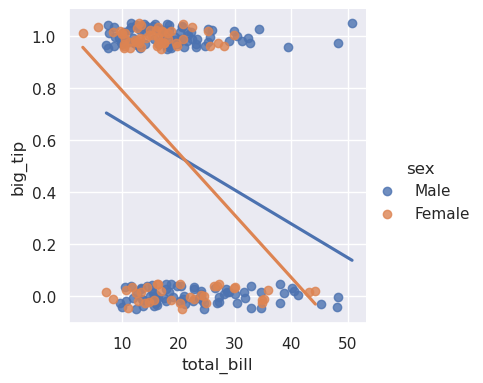

In [20]:
# fitting a normal linear regression model
sns.lmplot(
    data=restaurant_tips,
    x="total_bill",
    y="big_tip",
    hue="sex",
    height=4,
    ci=None,
    y_jitter=0.05,
)
plt.show()

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


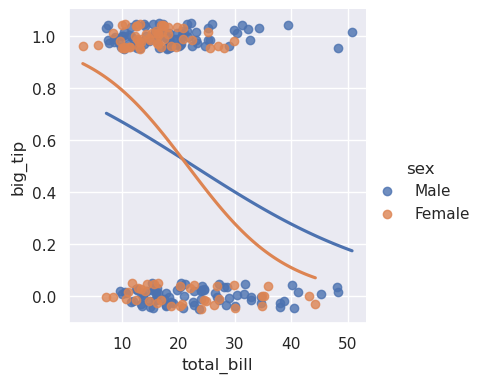

In [21]:
# using a logistic regression model
sns.lmplot(
    data=restaurant_tips,
    x="total_bill",
    y="big_tip",
    hue="sex",
    logistic=True,
    height=4,
    ci=None,
    y_jitter=0.05,
)
plt.show()